# Exploring the quality of embeddings
In this script we explore some of the qualities of the trained graph embeddings. This notebook contains the code to make all the figures from the paper. We have the code for both figure 1 and 2.

For figure 1, you need both the embedding files either loaded in RAM at the same time or you need to run the script twice and save the parameters. Since the embedding files are rather large, 8 gb RAM is adviced for loading one embedding file and 16 gb for loading two embedding files. 

For figure 2, you can use either of the embedding files.

Used files:
- Embedding file
- DBpedia entity collection

Used packages:
- numpy
- gensim
- pandas 
- sklearn
- scipy
- matplotlib
- umap-learn

## Code for figure 1:

In [1]:
# Load the data: default is embedding file with graph structure

import gensim

# Load the wordvectors using memory mapped files:
model = gensim.models.KeyedVectors.load('WKN-vectors.bin', mmap='r')
#model2 = gensim.models.KeyedVectors.load('WKN_no_lg-vectors.bin', mmap='r')


In [2]:
# Loading dbpedia entity collection

import pandas as pd
qrels = pd.read_csv('DBpedia-Entity/collection/v2/qrels-v2.txt', sep='\t',names = ['query_id', '', 'tag', 'rel'])

In [3]:
# Number of queries with relevant entities
qrels.loc[qrels['rel'] >0]['query_id'].nunique()

467

In [4]:
# Counting the number of relevant entities per query for some data exploration
query_counts = pd.DataFrame(qrels.loc[qrels['rel'] >0]['query_id'], columns = ['query_id'])
query_counts['freq'] = query_counts.groupby('query_id')['query_id'].transform('count')
query_counts = query_counts.drop_duplicates().sort_values(by=['freq'], ascending=False)


In [5]:
# Loading the queries
queries = pd.read_csv('DBpedia-Entity/collection/v2/queries-v2.txt', sep='\t',names = ['query_id', 'query'])

In [6]:
# Joining the queries with number of entities to the query title
query_counts.set_index('query_id').join(queries.set_index('query_id'))

,freq,query
query_id,,
QALD2_tr-59,1398,Give me all people with first name Jimmy.
QALD2_te-63,1190,Give me all Argentine films.
QALD2_tr-41,859,Give me all soccer clubs in Spain.
QALD2_tr-70,496,Give me all films produced by Hal Roach.
QALD2_tr-89,399,Give me all soccer clubs in the Premier League.
...,...,...
SemSearch_ES-129,1,pizza populous detroit mi
SemSearch_ES-29,1,ellis college
QALD2_tr-13,1,Which classis does the Millepede belong to?


In [25]:
# Selecting queries with more than 10 entities for coherence scores
chosen_queries = []
query_names = []
for index, row in query_counts.iterrows():
    if row['freq']> 10:
        chosen_queries.append(row['query_id'])
        query_names.append(queries.loc[queries['query_id'] == row['query_id']]['query'].values[0])



In [26]:
# Checking the number
len(query_names)

295

In [27]:
# getting the labels and entities for these queries
entities = []
label = []
for index, row in qrels.iterrows():
    if row['query_id'] in chosen_queries and row['rel'] > 0:
        entities.append(row['tag'])
        label.append(row['query_id'])


In [28]:
len(entities)

15913

In [29]:
entities

['<dbpedia:American_Chinese_cuisine>',
 '<dbpedia:Ants_climbing_a_tree>',
 '<dbpedia:Baingan_bharta>',
 '<dbpedia:Cellophane_noodles>',
 '<dbpedia:Chen_Kenichi>',
 '<dbpedia:Chen_Kenmin>',
 '<dbpedia:Chili_oil>',
 '<dbpedia:Chinatown>',
 '<dbpedia:Chinese_cuisine>',
 '<dbpedia:Doubanjiang>',
 '<dbpedia:Fuchsia_Dunlop>',
 '<dbpedia:Fuqi_feipian>',
 '<dbpedia:Guizhou_cuisine>',
 '<dbpedia:Guoba>',
 '<dbpedia:History_of_Chinese_cuisine>',
 '<dbpedia:Hot_and_sour_soup>',
 '<dbpedia:Hot_pot>',
 '<dbpedia:Hot_sauce>',
 '<dbpedia:Indian_Chinese_cuisine>',
 '<dbpedia:Kung_Pao_chicken>',
 '<dbpedia:List_of_Chinese_dishes>',
 '<dbpedia:Mala_sauce>',
 '<dbpedia:Mapo_doufu>',
 '<dbpedia:Pao_cai>',
 '<dbpedia:Shuizhu>',
 '<dbpedia:Sichuan>',
 '<dbpedia:Sichuan_cuisine>',
 '<dbpedia:Sichuan_pepper>',
 '<dbpedia:Sinki_(food)>',
 '<dbpedia:Suanla_chaoshou>',
 '<dbpedia:Twice_cooked_pork>',
 '<dbpedia:Vicia_faba>',
 '<dbpedia:Wonton>',
 '<dbpedia:Zha_cai>',
 '<dbpedia:Zhangcha_duck>',
 '<dbpedia:Aachen

In [30]:
# Script to convert dbpedia entities to wikipedia2vec entities
def entity_converter(word, reverse = False, nospace = True):
    if reverse:
        word = word.replace("<dbpedia:", "")
        word = word.replace(">", "")
        if nospace:
            return word
        else:
            word = word.replace("_", " ")
            return word
    else:
        word = word.replace("<dbpedia:", "ENTITY/")
        word = word.replace(">", "")
        return word

In [31]:
#  Loading the redirects
df = pd.read_csv('wikipedia_redirect.csv')
redirect_dict = {}
for index, tags in df.iterrows():
    redirect_dict[tags['original']] = tags['redirect']

In [32]:
# Getting all the embeddings of these chosen entities
in_corpus = 0
plot_ent = []
plot_label = []
plot_tag = []

for i in range(len(entities)):
    tag = entities[i]
    if tag in redirect_dict:
        tag = redirect_dict[tag]
    else:
        tag = entity_converter(tag)
    if tag in model.wv.vocab:
        in_corpus += 1
        plot_ent.append(tag)
        plot_label.append(label[i])
        plot_tag.append(entities[i])
    else:
        print(tag)
in_corpus


/home/emma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


ENTITY/San_Giorgio,_Campobasso
ENTITY/Minor_automotive_manufacturing_groups
ENTITY/MotorCityConnect
ENTITY/History_of_Poole
ENTITY/USS_Chimo_(ACM-1)
ENTITY/Bavaria_Solarpark
ENTITY/Fuente_Álamo_Solar_Power_Plant
ENTITY/Geiseltalsee_Solarpark
ENTITY/Lobosillo_Solar_Park
ENTITY/Planta_Solar_de_Salamanca
ENTITY/DMK_Erotic_Art_Museum
ENTITY/The_National_Irish_American_Museum_of_Washington,_D.C.
ENTITY/University_District_Museum_Without_Walls
ENTITY/Masala
ENTITY/Mumbai_culture
ENTITY/ERG_Renew
ENTITY/Urturn
ENTITY/List_of_films_influenced_by_the_Surrealist_movement
ENTITY/Epiphyllum_pumilum
ENTITY/Erysimum_baeticum
ENTITY/Erythronium_purpurascens
ENTITY/Snowball_bush
ENTITY/The_Last_Full_Measure_(film)
ENTITY/Indochina_War_timeline
ENTITY/War_in_Vietnam_(1954–59)
ENTITY/Phu_Quoc_Airport
ENTITY/Thanh_Hoa_Airport
ENTITY/Vietnam_Airlines_destinations
ENTITY/Czech_Guitar_Duo
ENTITY/Fernando_Egozcue
ENTITY/Michel_Jureidini
ENTITY/Spanish_guitar
ENTITY/Sylvester_Weaver
ENTITY/Southern_cone_music

ENTITY/UD_Tegueste
ENTITY/Unami_Club_Polideportivo
ENTITY/Unión_SC
ENTITY/Ebenezer_Wilson
ENTITY/AdTaily
ENTITY/Adaptly
ENTITY/Adcash
ENTITY/AddressTwo
ENTITY/Adgreetz
ENTITY/Admerasia
ENTITY/Advertising_Producers_Association
ENTITY/Adzerk
ENTITY/Agencynet
ENTITY/Armslist
ENTITY/B3NET_Inc.
ENTITY/BEC_(marketing)
ENTITY/BeInMedia_Agency
ENTITY/Bleublancrouge
ENTITY/Blink_Digital
ENTITY/Boathouse_Group
ENTITY/BurnsGroupNYC
ENTITY/CPP_Studios_Event_GmbH
ENTITY/Cabe_Rawit_Marketing_Communications
ENTITY/Casale_Media
ENTITY/Cidewalk
ENTITY/Cinsay_Inc.
ENTITY/Collarity
ENTITY/Crowell_Advertising
ENTITY/Cuponzote
ENTITY/Customer_Magnetism
ENTITY/Derooted_creative_agency
ENTITY/Direct_Agents
ENTITY/Due_North_Communications
ENTITY/E3_Media
ENTITY/ELink_Media,_Inc.
ENTITY/ExoClick
ENTITY/Gaumina
ENTITY/GeoEdge
ENTITY/Gozoop.com
ENTITY/Idea_Rebel
ENTITY/Ignitee_Digital_Services_Pvt_Ltd
ENTITY/India_Online
ENTITY/Isobar_Australia
ENTITY/Jugular_Advertising
ENTITY/Kilgannon
ENTITY/Kivuto_Solutions_

ENTITY/Sharp_Actius_RD3D_Notebook
ENTITY/Sharp_PC-1350
ENTITY/Cher_filmography
ENTITY/Take_Me_Home_Tour
ENTITY/St_Lucia_Game_Reserve
ENTITY/Jefferson's_Axiom
ENTITY/University_of_North_Dakota_soccer
ENTITY/University_of_North_Dakota_softball
ENTITY/Diocese_of_Westminster
ENTITY/Westminster_Abbey_by-election
ENTITY/Antón_Martín_(Madrid_Metro)
ENTITY/Fisher_v._University_of_Texas
ENTITY/J._Frank_Dobie_House
ENTITY/University_Teaching_Center
ENTITY/St_Macartin's_Cathedral,_Enniskillen
ENTITY/Adnan_Bukhari
ENTITY/Ameer_Bukhari
ENTITY/Timeline_for_September_following_the_September_11_attacks
ENTITY/Kenyan_cricket_team_in_South_Africa_in_1995–96
ENTITY/Kenyan_cricket_team_in_Zimbabwe_in_2002–03
ENTITY/2010_Major_League_Soccer_lockout/strike
ENTITY/National_Sales_Center
ENTITY/List_of_languages_by_the_number_of_countries_in_which_they_are_recognized_as_an_official_language
ENTITY/Canadian_provinces_without_major_sports_teams
ENTITY/Fueler
ENTITY/Republic_of_Vevčani
ENTITY/1959_in_Cuba
ENTITY/

15218

In [33]:
len(plot_ent)

15218

In [34]:
# Getting the queries for the embeddings we are going to plot

embeddings = [model[word] for word in plot_ent]
#embeddings = [model2[word] for word in plot_ent]



In [35]:
# Computing some scores for the embeddings
from sklearn import metrics
db = metrics.davies_bouldin_score(embeddings, plot_label)
sil = metrics.silhouette_score(embeddings, plot_label, metric = 'cosine')
#ch = metrics.calinski_harabasz_score(embeddings, plot_label)

In [36]:
print("Davies Bouldin score: ", round(db,2), " Silhouette score: ", round(sil,2))

Davies Bouldin score:  3.15  Silhouette score:  0.08


In [37]:
from scipy import spatial

# Computing the distance between all the relevant entities to a query
# Then, summing the amount of these with a cosine larger than 0.9
query_coherence = []
thresh = 0.9
for q in chosen_queries:
    entities = [i for i,v in enumerate(plot_label) if v == q]
    print("Now at query", q)
    M = len(entities)
    correct = 0.5*M*(M-1)
    q_c = 0
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            dist = 1 - spatial.distance.cosine(embeddings[i], embeddings[j])
            if dist > thresh:
                q_c += 1
    if correct == 0:
        query_coherence.append(0)
    else:
        query_coherence.append(q_c/correct)

Now at query QALD2_tr-59
Now at query QALD2_te-63
Now at query QALD2_tr-41
Now at query QALD2_tr-70
Now at query QALD2_tr-89
Now at query QALD2_tr-49
Now at query QALD2_te-17
Now at query INEX_LD-2010069
Now at query QALD2_tr-91
Now at query INEX_LD-20120511
Now at query QALD2_tr-26
Now at query QALD2_tr-64
Now at query INEX_LD-2009063
Now at query QALD2_tr-51
Now at query QALD2_te-39
Now at query INEX_LD-2009039
Now at query INEX_LD-20120411
Now at query QALD2_tr-68
Now at query INEX_LD-2010004
Now at query QALD2_tr-79
Now at query INEX_LD-20120112
Now at query QALD2_te-9
Now at query INEX_LD-20120512
Now at query INEX_XER-127
Now at query INEX_XER-144
Now at query INEX_XER-63
Now at query INEX_LD-2012354
Now at query INEX_XER-86
Now at query INEX_LD-2010043
Now at query QALD2_te-82
Now at query INEX_LD-20120521
Now at query INEX_LD-20120221
Now at query INEX_XER-140
Now at query INEX_XER-128
Now at query INEX_XER-96
Now at query INEX_XER-113
Now at query INEX_LD-2009061
Now at query 

In [38]:
query_coherence_9 = query_coherence
# query_coherence_no_lg_9 = query_coherence

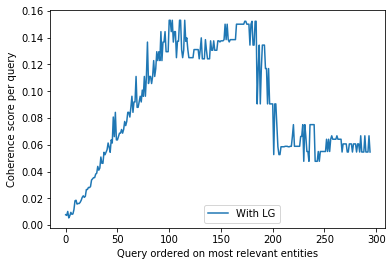

In [39]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot(range(len(query_coherence_9)),query_coherence_9)
#plt.plot(range(len(query_coherence_no_lg_9)),query_coherence_no_lg_9)


plt.xlabel('Query ordered on most relevant entities')
plt.ylabel('Coherence score per query')
plt.legend(['With LG'],loc='lower right', bbox_to_anchor=(0.7,0))
#plt.legend(['With LG', 'Without LG'],loc='lower right', bbox_to_anchor=(0.7,0))
plt.show()

In [40]:
# f.savefig("coherence_9.pdf", bbox_inches='tight')

In [42]:
# Computing the distance between all the relevant entities to a query
# Then, summing the amount of these with a cosine larger than 0.8

query_coherence = []
thresh = 0.8
for q in chosen_queries:
    entities = [i for i,v in enumerate(plot_label) if v == q]
    print("Now at query", q)
    M = len(entities)
    correct = 0.5*M*(M-1)
    q_c = 0
    for i in range(len(entities)):
        for j in range(i+1, len(entities)):
            dist = 1 - spatial.distance.cosine(embeddings[i], embeddings[j])
            if dist > thresh:
                q_c += 1
    if correct == 0:
        query_coherence.append(0)
    else:
        query_coherence.append(q_c/correct)

Now at query QALD2_tr-59
Now at query QALD2_te-63
Now at query QALD2_tr-41
Now at query QALD2_tr-70
Now at query QALD2_tr-89
Now at query QALD2_tr-49
Now at query QALD2_te-17
Now at query INEX_LD-2010069
Now at query QALD2_tr-91
Now at query INEX_LD-20120511
Now at query QALD2_tr-26
Now at query QALD2_tr-64
Now at query INEX_LD-2009063
Now at query QALD2_tr-51
Now at query QALD2_te-39
Now at query INEX_LD-2009039
Now at query INEX_LD-20120411
Now at query QALD2_tr-68
Now at query INEX_LD-2010004
Now at query QALD2_tr-79
Now at query INEX_LD-20120112
Now at query QALD2_te-9
Now at query INEX_LD-20120512
Now at query INEX_XER-127
Now at query INEX_XER-144
Now at query INEX_XER-63
Now at query INEX_LD-2012354
Now at query INEX_XER-86
Now at query INEX_LD-2010043
Now at query QALD2_te-82
Now at query INEX_LD-20120521
Now at query INEX_LD-20120221
Now at query INEX_XER-140
Now at query INEX_XER-128
Now at query INEX_XER-96
Now at query INEX_XER-113
Now at query INEX_LD-2009061
Now at query 

In [44]:
query_coherence_8 = query_coherence
#query_coherence_no_lg_8 = query_coherence

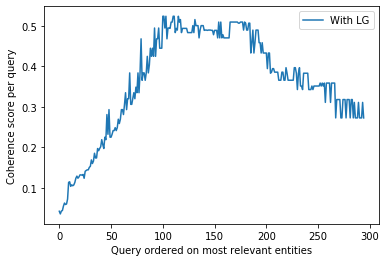

In [45]:
f = plt.figure()
#plt.plot(range(len(query_coherence_no_lg_8)),query_coherence_no_lg_8)
plt.plot(range(len(query_coherence_8)),query_coherence_8)
plt.xlabel('Query ordered on most relevant entities')
plt.ylabel('Coherence score per query')
plt.legend(['With LG'])
#plt.legend(['With LG', 'Without LG'],loc='lower right', bbox_to_anchor=(0.7,0))

plt.show()

In [ ]:
f.savefig("coherence_8.pdf", bbox_inches='tight')

In [47]:
# Repeating the same process as above with only 12 queries:
# but now for making UMAP plots

# Selecting queries with between 105 and 200 relevant entities
chosen_queries = []
query_names = []
for index, row in query_counts.iterrows():
    if row['freq']> 105 and row['freq'] < 200:
        chosen_queries.append(row['query_id'])
        query_names.append(queries.loc[queries['query_id'] == row['query_id']]['query'].values[0])

entities = []
label = []
for index, row in qrels.iterrows():
    if row['query_id'] in chosen_queries and row['rel'] > 0:
        entities.append(row['tag'])
        label.append(row['query_id'])
        
in_corpus = 0
plot_ent = []
plot_label = []
plot_tag = []

for i in range(len(entities)):
    tag = entities[i]
    if tag in redirect_dict:
        tag = redirect_dict[tag]
    else:
        tag = entity_converter(tag)
    if tag in model.wv.vocab:
        in_corpus += 1
        plot_ent.append(tag)
        plot_label.append(label[i])
        plot_tag.append(entities[i])
    else:
        print(tag)
in_corpus


ENTITY/San_Giorgio,_Campobasso
ENTITY/History_of_Poole
ENTITY/USS_Chimo_(ACM-1)
ENTITY/Masala
ENTITY/Mumbai_culture
ENTITY/Indochina_War_timeline
ENTITY/War_in_Vietnam_(1954–59)
ENTITY/100_years_for_a_million_trees_race
ENTITY/2008_Tour_de_Vineyards
ENTITY/Golan_(cycling_race)
ENTITY/Peruvian_Cycling_Federation
ENTITY/Aria_Crescendo
ENTITY/Dulcie_Younger
ENTITY/List_of_awards_and_nominations_received_by_Avril_Lavigne
ENTITY/List_of_awards_and_nominations_received_by_Gwen_Stefani
ENTITY/List_of_awards_and_nominations_received_by_Tina_Turner
ENTITY/Rachèl_Louise
ENTITY/Sadie_Jemmett
ENTITY/ArsEdition
ENTITY/Grouptime
ENTITY/HAWE_Hydraulik_SE
ENTITY/Jivala
ENTITY/Munich_Markets
ENTITY/Torry_Harris_Business_Solutions
ENTITY/EG_LNG_Pipeline_Suspension_Bridge
ENTITY/Fort_Edmonton_Footbridge
ENTITY/Lal_Mandi_Footbridge
ENTITY/Akademie
ENTITY/R.A.N._Public_School
ENTITY/Communist_Mutants_from_Space
ENTITY/Fsn
ENTITY/Kelaroo
ENTITY/Ness_Computing
ENTITY/Phaser_Patrol
ENTITY/TextCrypt
ENTITY/Web

/home/emma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


1667

In [50]:
# Function to make PCA/TSNE/UMAP of embeddings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
reducer=umap.UMAP()
import matplotlib.pyplot as plt
import numpy as np

def words_pca(word_list, model, transform = 'pca'):
    # Looking up the vectors per word
    bias_vectors = [model[word] for word in word_list]
    # scaling the wordvectors
    bias_vectors = StandardScaler().fit_transform(bias_vectors)
    # applying PCA with 2 components
    if transform == 'pca':
        pca = PCA(n_components=2)
        bias_pca = pca.fit_transform(bias_vectors)
    # applying tsne
    elif transform == 'tsne':
        bias_pca = TSNE(n_components=2).fit_transform(bias_vectors)
    # applying umap
    else:
        bias_pca = umap.UMAP().fit_transform(bias_vectors)
    return bias_pca

In [51]:
import numpy as np

In [52]:
# setting the plotsize
plt.rcParams['figure.figsize'] = [10, 7]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

In [55]:
# Computing the PCA
ent_pca = words_pca(plot_ent, model = model, transform = 'umap')

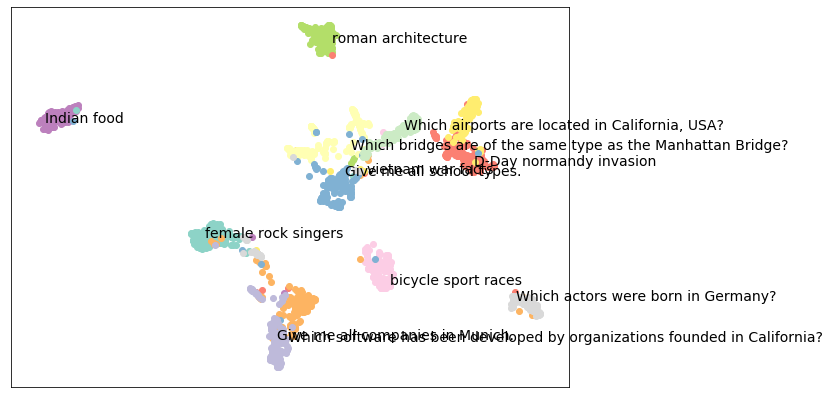

In [61]:
# Plotting all the relevant entities of the 12 selected queries

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']


# Set to True if you want the names on the side of the scatter plot
# Set legend to False if you want the names in the scatter plots
legend = False

# Plotting the PCA with words
f = plt.figure()


c_i = [chosen_queries.index(label) for label in plot_label]

if legend:
    for i in range(len(chosen_queries)):
        plot_x = [ent_pca[j,0] for j,q in enumerate(plot_label) if q == chosen_queries[i]]
        plot_y = [ent_pca[j,1] for j,q in enumerate(plot_label) if q == chosen_queries[i]]
        plt.scatter(plot_x, plot_y, color = colors[i], label = query_names[i])#, cmap = plt.get_cmap('Set3'))#, cmap = colors)
    plt.legend(loc='upper right', bbox_to_anchor=(0,1))
    
else:
    first = np.zeros(len(colors))
    for i,word in enumerate(ent_pca):
       x = ent_pca[i,0]
       y = ent_pca[i,1]
       plabel = plot_label[i]
       c_i = chosen_queries.index(plabel)
       plt.scatter(x, y, marker='o', color=colors[c_i], label = plabel)
       if first[c_i] == 0:
           plt.text(x+0.1, y-0.1, query_names[c_i], fontsize=14)
           first[c_i] = 1
        
#plt.xlabel('First principal component')
#plt.ylabel('Second principal component')
plt.xticks([])
plt.yticks([])


plt.show()

In [44]:
#f.savefig("umap.pdf", bbox_inches='tight')

In [62]:
list(zip(chosen_queries, query_names))

[('INEX_LD-20120511', 'female rock singers'),
 ('QALD2_tr-26',
  'Which bridges are of the same type as the Manhattan Bridge?'),
 ('QALD2_tr-64',
  'Which software has been developed by organizations founded in California?'),
 ('INEX_LD-2009063', 'D-Day normandy invasion'),
 ('QALD2_tr-51', 'Give me all school types.'),
 ('QALD2_te-39', 'Give me all companies in Munich.'),
 ('INEX_LD-2009039', 'roman architecture'),
 ('INEX_LD-20120411', 'bicycle sport races'),
 ('QALD2_tr-68', 'Which actors were born in Germany?'),
 ('INEX_LD-2010004', 'Indian food'),
 ('QALD2_tr-79', 'Which airports are located in California, USA?'),
 ('INEX_LD-20120112', 'vietnam war facts')]

# Looking at False positives (mentioned, not shown in paper)
We load a run from DBpedia entity collection, get the 10 highest rated non relevant entities for the plotted queries and plot those as well

In [64]:
lmrun =  pd.read_csv('DBpedia-Entity/runs/v2/lm.run', sep='\t', names = ['query_id', 'x1', 'tag', 'rang', 'x2', 'x3'])

In [65]:
lmrun

,query_id,x1,tag,rang,x2,x3
0,INEX_LD-2009022,Q0,<dbpedia:Sichuan_cuisine>,1,-24.405157,lm
1,INEX_LD-2009022,Q0,<dbpedia:Indian_Chinese_cuisine>,2,-26.524585,lm
2,INEX_LD-2009022,Q0,<dbpedia:Korean_cuisine>,3,-31.461818,lm
3,INEX_LD-2009022,Q0,<dbpedia:National_dish>,4,-31.711318,lm
4,INEX_LD-2009022,Q0,<dbpedia:List_of_Asian_cuisines>,5,-31.842184,lm
...,...,...,...,...,...,...
484001,TREC_Entity-9,Q0,<dbpedia:Concord_Art_Association>,996,-31.692715,lm
484002,TREC_Entity-9,Q0,<dbpedia:Trio_Voronezh>,997,-31.829635,lm
484003,TREC_Entity-9,Q0,<dbpedia:Louis_Hellman>,998,-31.931519,lm
484004,TREC_Entity-9,Q0,<dbpedia:Lone_Wiggers>,999,-31.942991,lm


In [67]:
plot_ent_fp = []
plot_label_fp = []
plot_tag_fp = []

for query in chosen_queries:
    test = pd.DataFrame(lmrun.loc[lmrun['query_id'] == query])
    res = [plot_tag[i] for i, v in enumerate(plot_label) if v == query]
    false_positives = 0
    for index, row in test.iterrows():
        #if row['tag'] not in res:
        if ((qrels['rel'] == 0) & (qrels['query_id'] == query) & (qrels['tag'] == row['tag'])).any():
            tag = row['tag']
            if tag in redirect_dict:
                tag = redirect_dict[tag]
            else:
                tag = entity_converter(tag)
            if tag in model.wv.vocab:
                false_positives += 1
                plot_ent_fp.append(tag)
                plot_label_fp.append(query)
                plot_tag_fp.append(row['tag'])
            else:
                print(tag)
        if false_positives == 10:
            break


/home/emma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


ENTITY/Fpath_Development
ENTITY/Fuck_the_Facts_split_albums


In [68]:
plot_ent_all = plot_ent + plot_ent_fp
plot_label_all = plot_label + plot_label_fp

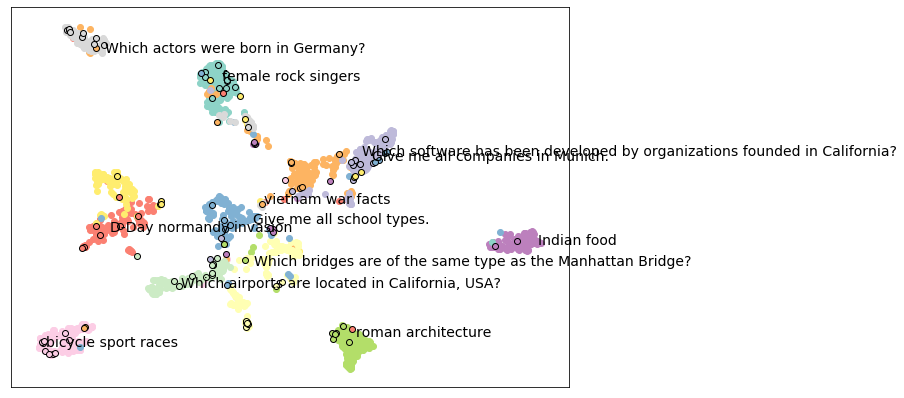

In [70]:

ent_pca = words_pca(plot_ent_all, model = model, transform = 'umap')
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
first = np.zeros(len(colors))


# Plotting the PCA with words
f = plt.figure()



for i,word in enumerate(ent_pca):
    x = ent_pca[i,0]
    y = ent_pca[i,1]
    label = plot_label_all[i]
    c_i = chosen_queries.index(label)
    if plot_ent_all[i] in plot_ent:
        plt.scatter(x, y, marker='o', color=colors[c_i])
        if first[c_i] == 0:
            plt.text(x+0.1, y-0.1, query_names[c_i], fontsize=14)
            first[c_i] = 1
    else:
        plt.scatter(x, y, marker='o', color=colors[c_i], edgecolors = 'black')

        

        
#plt.xlabel('First principal component')
#plt.ylabel('Second principal component')
plt.xticks([])
plt.yticks([])


plt.show()

False positives are denoted by a black line around the scatter circle. As we can see, most of them land amongst the relevant entities to that query.

In [71]:
[[plot_ent_fp[i], query_names[chosen_queries.index(plot_label_fp[i])]] for i, v in enumerate(plot_label_fp)]


[['ENTITY/Erinn_Swan', 'female rock singers'],
 ['ENTITY/It_Was_Romance', 'female rock singers'],
 ['ENTITY/Bonnie_Raitt', 'female rock singers'],
 ['ENTITY/Connie_Francis', 'female rock singers'],
 ['ENTITY/Ryan_Starr', 'female rock singers'],
 ['ENTITY/Dalida', 'female rock singers'],
 ['ENTITY/Kathi_Wilcox', 'female rock singers'],
 ['ENTITY/Julia_Neigel', 'female rock singers'],
 ['ENTITY/Kelly_Johnson_(guitarist)', 'female rock singers'],
 ['ENTITY/Andrée_Watters', 'female rock singers'],
 ['ENTITY/Alexander_Hamilton_Bridge',
  'Which bridges are of the same type as the Manhattan Bridge?'],
 ['ENTITY/Brooklyn_Bridge',
  'Which bridges are of the same type as the Manhattan Bridge?'],
 ['ENTITY/Broadway_Bridge_(Manhattan)',
  'Which bridges are of the same type as the Manhattan Bridge?'],
 ['ENTITY/List_of_road–rail_bridges',
  'Which bridges are of the same type as the Manhattan Bridge?'],
 ['ENTITY/High_Bridge_(New_York_City)',
  'Which bridges are of the same type as the Manhatta